# Comparing CSDT and Scikit-Learn Decision Tree Regressors for Diabetes Dataset

This notebook implements and compares:
1. A Custom Decision Tree Regressor (CSDT) that uses Mean Squared Error (MSE) for splitting.
2. Scikit-Learn's `DecisionTreeRegressor`.

The dataset used is the `diabetes_dataset.csv` containing features like `age`, `sex`, `bmi`, and `target`.


## 1. Import Necessary Libraries

We use:
- **Data Manipulation**: `numpy`, `pandas`
- **Decision Tree Regressors**: Custom `CSDT` and Scikit-Learn's `DecisionTreeRegressor`
- **Evaluation Metrics**: Mean Squared Error (MSE)
- **Visualization**: `matplotlib` for tree visualization


In [16]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from sklearn.tree import plot_tree
from IPython.display import display
from IPython.display import Image
import sys
base_folder = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(base_folder, "..")))
import csdt
from csdt import CSDT, split_criteria_with_methods
base_folder = os.getcwd()

## 2. Set Global Variables and Configuration

We define:
- **Random Seed**: Ensures reproducibility.
- **Hyperparameters**:
  - `min_samples_split`: Minimum samples needed to split a node.
  - `min_samples_leaf`: Minimum samples required at a leaf node.
  - `max_depth`: Maximum depth of the tree.
- **Features and Target**: Define column names for inputs and outputs.


In [17]:
SEED = 0
np.random.seed(SEED)

ocdt_min_samples_split = 10
ocdt_min_samples_leaf = 5
ocdt_depth = 5
verbose = False

base_folder = os.getcwd()

features_list = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
target_list = ['target']


## 3. Load and Split Dataset

We load the diabetes dataset (`diabetes_dataset.csv`) and split it into:
- **Training Set**: 80% of the data for training.
- **Testing Set**: 20% of the data for evaluation.

The features are:
- Age, sex, BMI, blood pressure (bp), and several blood test results (s1-s6).

The target is:
- A quantitative measure of disease progression after one year.


In [18]:
# Load dataset
df = pd.read_csv(os.path.join(base_folder, "../datasets/diabetes_dataset.csv"))

# Extract features and target
features_df = df[features_list]
target_df = df[target_list]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    features_df, target_df, test_size=0.2, random_state=SEED
)


## 4. Define Utility Functions

### Return Mean
- Used to determine the value of leaf nodes in the custom regressor.

### Calculate Mean Squared Error (MSE)
- Used as the splitting criterion in the custom regressor.


In [19]:
# Function to calculate mean value for leaf nodes
def return_mean(y, x):
    return y.mean(axis=0).astype(np.float64)

# Function to calculate Mean Squared Error
def calculate_mse(y, predictions):
    mse = mean_squared_error(y, predictions)
    return np.float64(mse)


## 5. Implement Custom Decision Tree Regressor (CSDT)

The custom decision tree uses:
- Mean Squared Error (MSE) as the splitting criterion.
- Mean value of target variable for predictions at leaf nodes.


In [20]:
# Define split criteria using custom MSE and mean functions
split_criteria = lambda y, x: split_criteria_with_methods(
    y, x, pred=return_mean, split_criteria=calculate_mse
)

# Initialize the custom decision tree regressor
tree = CSDT(
    max_depth=ocdt_depth,
    min_samples_leaf=ocdt_min_samples_leaf,
    min_samples_split=ocdt_min_samples_split,
    split_criteria=split_criteria,
    verbose=verbose
)

# Train the CSDT regressor
tree.fit(X_train, y_train)

# Predict on the test set
y_pred = tree.predict(X_test)


## 6. Evaluate CSDT Regressor

We calculate the Mean Squared Error (MSE) for the predictions made by the custom regressor.


In [21]:
# Calculate and display MSE for CSDT
ocdt_mse = mean_squared_error(y_test, y_pred)
print(f"CSDT MSE: {ocdt_mse}")


CSDT MSE: 4781.768456810253


## 7. Implement and Evaluate Scikit-Learn Regressor

We use Scikit-Learn's `DecisionTreeRegressor`:
- Same hyperparameters as CSDT for fair comparison.
- Evaluate using Mean Squared Error (MSE).


In [22]:
# Initialize Scikit-Learn decision tree regressor
regressor = DecisionTreeRegressor(
    random_state=20,
    min_samples_leaf=ocdt_min_samples_leaf,
    min_samples_split=ocdt_min_samples_split,
    max_depth=ocdt_depth
)

# Train the Scikit-Learn regressor
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_sklearn = regressor.predict(X_test)

# Calculate and display MSE for Scikit-Learn
dt_mse = mean_squared_error(y_test, y_pred_sklearn)
print(f"Scikit-Learn DT MSE: {dt_mse}")


Scikit-Learn DT MSE: 4781.768456810253


## 8. Visualize Decision Trees

We generate visualizations for:
1. The Custom Decision Tree Regressor (CSDT)
2. The Scikit-Learn Decision Tree Regressor


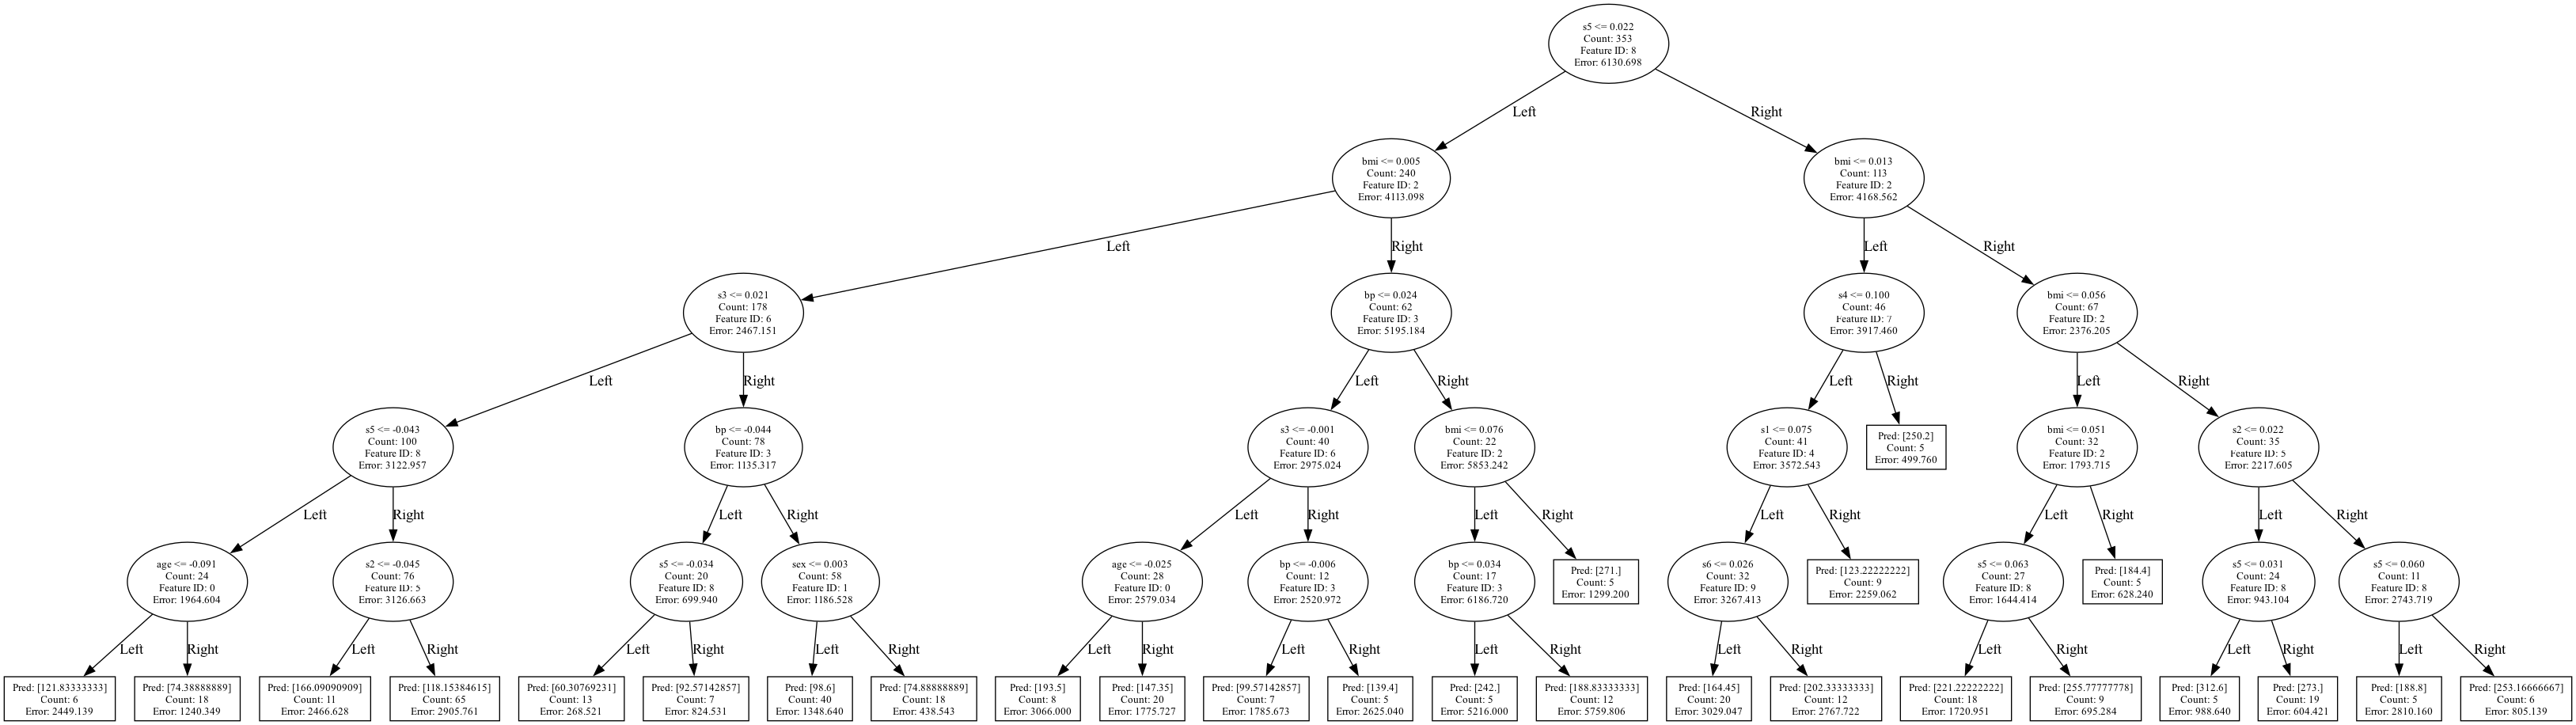

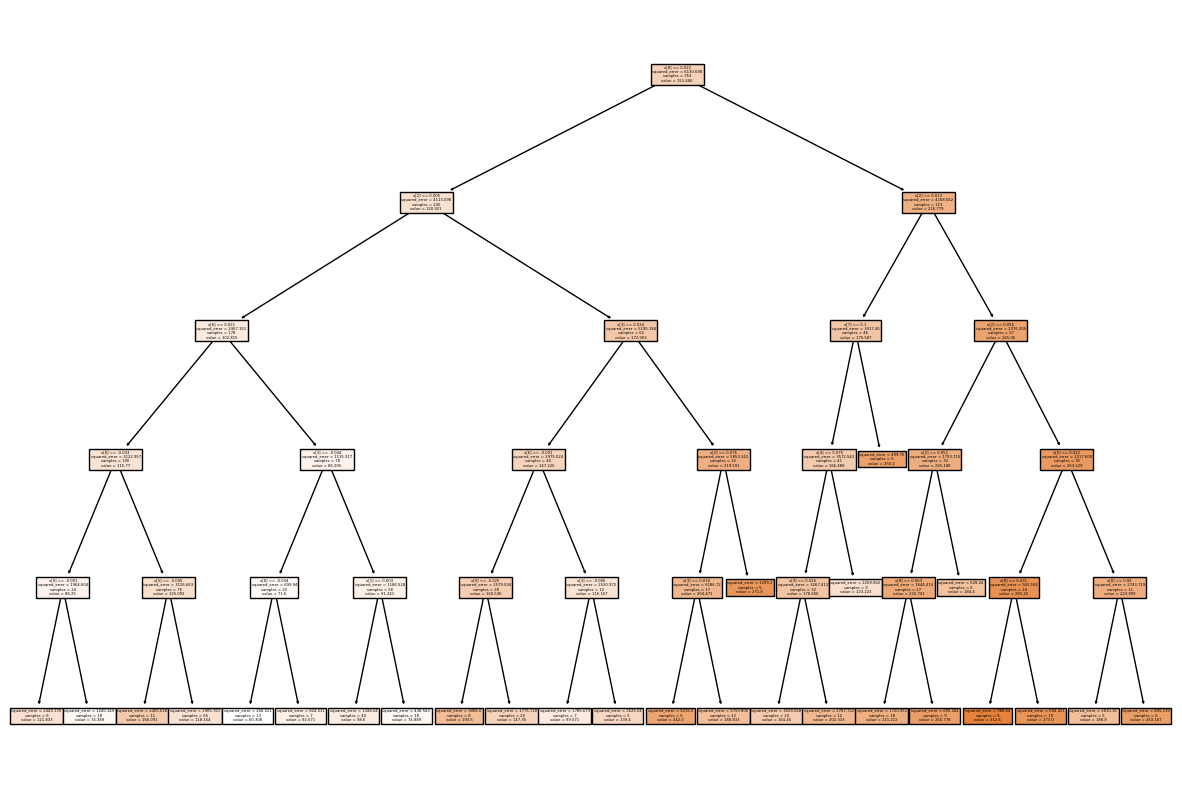

In [23]:
# Create output folder for results
output_folder = "results"
os.makedirs(output_folder, exist_ok=True)

# Visualize and save the CSDT tree
csdt_output_path = os.path.join(output_folder, 'diabetes_classifier')
dot = tree.draw_tree()
dot.render(csdt_output_path, format='png', view=True)
display(Image(filename=f"{csdt_output_path}.png"))


# Visualize and save the Scikit-Learn tree
plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True)
sklearn_output_path = os.path.join(output_folder, 'diabetes_sklearn_dt.png')
plt.savefig(sklearn_output_path, format='png', dpi=300, bbox_inches='tight')
